<a href="https://colab.research.google.com/github/fAikoH-dot/TCC-v1/blob/main/arima/auto_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

In [9]:
# df = pd.read_csv("sample_data/Trigo_v1.csv", sep = ";")
df = pd.read_csv('../../data library/Algodao_v1.csv', sep=";")
df = df.sort_values(by='Data').reset_index(drop=True)
# df.set_index("Data", inplace = True)
df.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima
0,2005-01-01,Algodão,41.3763,41.0963,3.0,4376.0,4451.0,4831.0,4240.0
1,2005-02-01,Algodão,40.0096,41.2643,3.0,5030.0,4420.0,5030.0,4261.0
2,2005-03-01,Algodão,37.3086,40.0517,3.0,5303.0,5015.0,5460.0,4775.0
3,2005-04-01,Algodão,39.1540,40.9909,3.0,5800.0,5315.0,6050.0,5055.0
4,2005-05-01,Algodão,35.0431,38.6424,3.0,4864.0,5770.0,5800.0,4850.0


In [10]:
!pip install python-bcb

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Program Files\Python313\python.exe -m pip install --upgrade pip


In [11]:
from bcb import PTAX
from bcb import currency

ptax = PTAX()

df_usd = currency.get(['USD'],
                  start='2004-03-01',
                  end='2024-10-01',
                  side='ask')

df_usd["Date"]=df_usd.index
df_usd["Month"] = df_usd["Date"].dt.month
df_usd["Year"] = df_usd["Date"].dt.year
df_usd["Day"] = 1
df_usd["Aux"] = df_usd["Year"].astype(str) +"-"+ df_usd["Month"].astype(str)
df_usd = df_usd.groupby("Aux").agg(
    USD = ("USD", "mean"),
    day = ("Day", "first"),
    month = ("Month", "first"),
    year = ("Year", "first"),
).reset_index(drop=True)

df_usd["Data"] = pd.to_datetime(df_usd[['year', 'month', 'day']])
df_usd = df_usd[["Data", "USD"]].sort_values(by="Data").reset_index(drop=True)

In [12]:
# clima = pd.read_csv("sample_data/MT_dados.csv", sep=';')
clima = pd.read_csv("../../data library/Clima/MT_dados.csv", sep=';')

clima.rename(columns={"PRECIPITACAO TOTAL":"precipitacao", "TEMPERATURA MEDIA":"temperatura"}, inplace=True)

clima["precipitacao"] = clima.precipitacao.str.replace(',', '.')
clima["temperatura"] = clima.temperatura.str.replace(',', '.')

clima.bfill(inplace=True)
clima.head()

,Data Medicao,precipitacao,temperatura
0,31/03/2004,175.4,24.9
1,30/04/2004,175.4,24.5
2,31/05/2004,23,21.7
3,30/06/2004,18.8,22.1
4,31/07/2004,38,22.2


In [13]:
df["USD"] = df_usd["USD"]
df["Precipitacao"] = clima["precipitacao"].astype(float)
df["Temperatura"] = clima["temperatura"].astype(float)
df['lag_Estadual'] = df['Estadual'].shift(1)
df['lag_Estadual'] = df['lag_Estadual'].bfill()
df.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima,USD,Precipitacao,Temperatura,lag_Estadual
0,2005-01-01,Algodão,41.3763,41.0963,3.0,4376.0,4451.0,4831.0,4240.0,2.905457,175.4,24.9,41.3763
1,2005-02-01,Algodão,40.0096,41.2643,3.0,5030.0,4420.0,5030.0,4261.0,2.905985,175.4,24.5,41.3763
2,2005-03-01,Algodão,37.3086,40.0517,3.0,5303.0,5015.0,5460.0,4775.0,3.100419,23.0,21.7,40.0096
3,2005-04-01,Algodão,39.1540,40.9909,3.0,5800.0,5315.0,6050.0,5055.0,3.129148,18.8,22.1,37.3086
4,2005-05-01,Algodão,35.0431,38.6424,3.0,4864.0,5770.0,5800.0,4850.0,3.036777,38.0,22.2,39.1540


In [14]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
  Using cached pmdarima-2.0.4.tar.gz (630 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Cython-3.0.12-cp313-cp313-win_amd64.whl.metadata (3.6 kB)
  Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached Cython-3.0.12-cp313-cp313-win_amd64.whl (2.8 MB)
Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl (9.8 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Failed to build pmdarima


  error: subprocess-exited-with-error
  
  × Building wheel for pmdarima (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [41 lines of output]
      Partial import of pmdarima during the build process.
      
      Requirements: ['joblib>=0.11\nCython>=0.29,!=0.29.18,!=0.29.31\nnumpy>=1.21.2\npandas>=0.19\nscikit-learn>=0.22\nscipy>=1.3.2\nstatsmodels>=0.13.2\nurllib3\nsetuptools>=38.6.0,!=50.0.0\npackaging>=17.1  # Bundled with setuptools, but want to be explicit\n']
      Adding extra setuptools args
      Setting up with setuptools
      Traceback (most recent call last):
        File "C:\Program Files\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
          ~~~~^^
        File "C:\Program Files\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                               

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from pmdarima.arima import auto_arima
from pmdarima import arima
from pmdarima.utils import tsdisplay, autocorr_plot, decomposed_plot, plot_acf, plot_pacf
from matplotlib.pyplot import rcParams

rcParams['figure.figsize']=15,6

from pmdarima.arima import ADFTest
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [16]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

In [17]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):


    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

def plot_predictions(testing_dates, y_test, prediction):
    df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
    _, ax = plt.subplots(figsize=(10, 5))
    df_test.plot(ax=ax, label="Actual", x="date", y="actual")
    df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
    plt.legend(["Actual", "Prediction"])
    plt.show()

In [18]:
def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"RMSE: {root_mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  print(f"R-Squared: {r2_score(y_test, prediction)}")

In [19]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

check_stationarity(train["Estadual"], name=train["Estadual"].name)

    Augmented Dickey-Fuller Test on "Estadual" 
    -----------------------------------------------
ADF Statistic: -1.880401
p-value: 0.341336
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575
Non-stationary


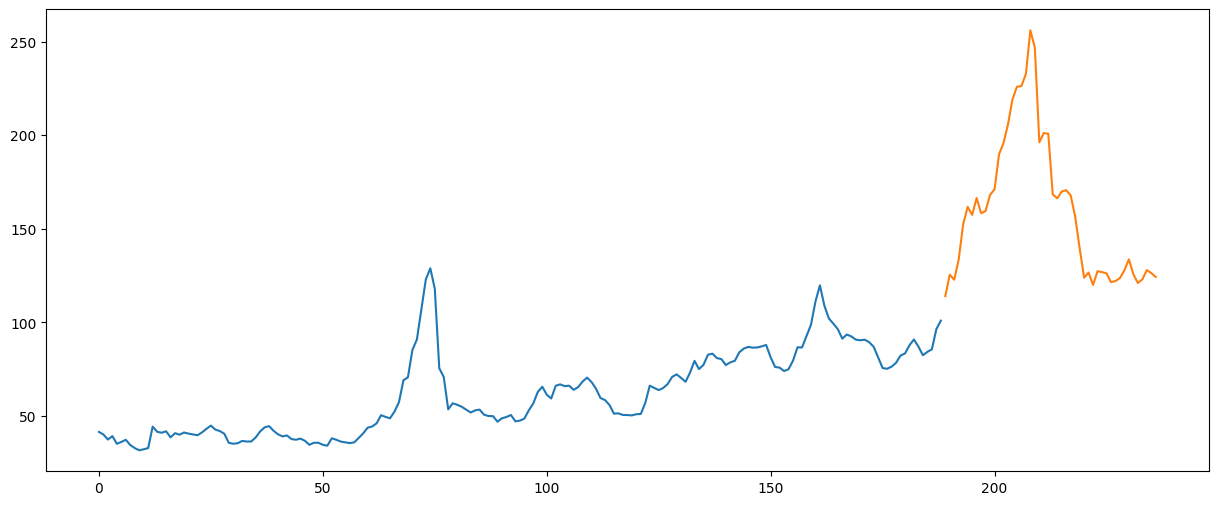

In [20]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

test_dates = test.Data

# train = train.Estadual
# test = test.Estadual

plt.plot(train.Estadual)
plt.plot(test.Estadual)

In [21]:
from pmdarima.arima import ADFTest

adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df["Estadual"])

##Dado Não-Estacionário > I = 0

(0.21860020904686753, True)

In [22]:
train.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima,USD,Precipitacao,Temperatura,lag_Estadual
0,2005-01-01,Algodão,41.3763,41.0963,3.0,4376.0,4451.0,4831.0,4240.0,2.905457,175.4,24.9,41.3763
1,2005-02-01,Algodão,40.0096,41.2643,3.0,5030.0,4420.0,5030.0,4261.0,2.905985,175.4,24.5,41.3763
2,2005-03-01,Algodão,37.3086,40.0517,3.0,5303.0,5015.0,5460.0,4775.0,3.100419,23.0,21.7,40.0096
3,2005-04-01,Algodão,39.1540,40.9909,3.0,5800.0,5315.0,6050.0,5055.0,3.129148,18.8,22.1,37.3086
4,2005-05-01,Algodão,35.0431,38.6424,3.0,4864.0,5770.0,5800.0,4850.0,3.036777,38.0,22.2,39.1540


# USD

In [23]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

test_dates = test.Data

In [24]:
arima_model = auto_arima(train.Estadual, X = train[["USD", "País"]],start_p=0, d=0, start_q=0,
                         max_p = 5, max_d = 5, max_q = 5,
                         start_P = 0, D = 0, start_Q=5,
                         max_P=5, max_D=5, max_Q=5,
                         m=12, seasonal=True, error_action ="warn",
                         Trace=True, random_state=20, n_fits=50)

In [25]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  189
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                -341.946
Date:                             Sun, 04 May 2025   AIC                            697.892
Time:                                     23:43:29   BIC                            720.584
Sample:                                          0   HQIC                           707.085
                                             - 189                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.7469      0.390     -1.917      0.055      -1.511       0.017
USD           -0.2066      0.515     -0.401      0.689      -1.217       0.804
País           1.0385      0.012     86.571      0.000       1.015       1.062
ar.L1          0.6892      0.122      5.653      0.000       0.450       0.928
ma.L1         -0.2370      0.133     -1.781      0.075      -0.498       0.024
ar.S.L12       0.1135      0.097      1.170      0.242      -0.077       0.304
sigma2         2.1739      0.089     24.326      0.000       1.999       2.349
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2246.30
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
prediction = pd.DataFrame(arima_model.predict(n_periods=len(test), X=test[["USD", "País"]]),
                          # index=test.index
                          )
prediction.columns = ["predicted_Estadual"]
prediction.index = test.index

C:\Users\hamatsu\AppData\Local\Temp\ipykernel_868\3360805911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Data"] = test.index


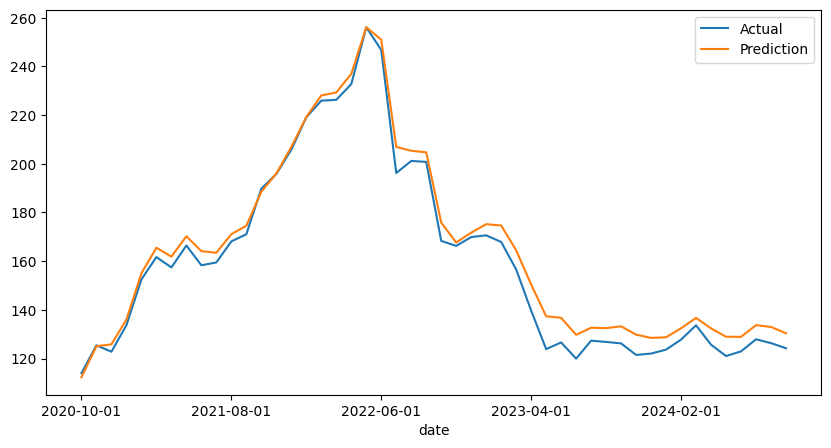

In [27]:
test["Data"] = test.index
testing_dates = test_dates

plot_predictions(testing_dates, test.Estadual, prediction.predicted_Estadual)

In [28]:
test = pd.DataFrame(test)
test["predict_Estadual"] = prediction['predicted_Estadual']
test.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima,USD,Precipitacao,Temperatura,lag_Estadual,predict_Estadual
189,189,Algodão,113.9626,112.5502,3.0,7058.0,6659.0,7377.0,6571.0,4.109590,0.0,24.7,100.8865,112.309157
190,190,Algodão,125.4194,124.6481,3.0,7305.0,7041.0,7508.0,6971.0,4.149464,0.0,25.2,113.9626,125.054149
191,191,Algodão,122.7905,125.1981,3.0,7917.0,7305.0,7946.0,7197.0,4.341011,0.0,24.6,125.4194,125.814455
192,192,Algodão,133.6717,134.9602,3.0,8278.0,7944.0,8468.0,7944.0,4.883855,0.0,25.4,122.7905,136.019554
193,193,Algodão,152.5190,153.2923,3.0,8971.0,8272.0,9622.0,8201.0,5.325580,0.0,24.8,133.6717,155.027556


In [29]:
evaluate_model(test["Estadual"], test["predict_Estadual"])

MAE: 4.837102090499714
RMSE: 5.7100324644038585
MAPE: 0.03383923047425173
R-Squared: 0.9778230664130325


# Multiple Variables

In [30]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

test_dates = test.Data

In [31]:
arima_model = auto_arima(train.Estadual, X = train[["USD", "País", "Último", "Máxima", "Precipitacao", "lag_Estadual"]],start_p=0, d=0, start_q=0,
                         max_p = 5, max_d = 5, max_q = 5,
                         start_P = 0, D = 0, start_Q=5,
                         max_P=5, max_D=5, max_Q=5,
                         m=12, seasonal=True, error_action ="warn",
                         Trace=True, random_state=20, n_fits=50)

In [32]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  189
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                -340.949
Date:                            Sun, 04 May 2025   AIC                            701.899
Time:                                    23:51:06   BIC                            734.316
Sample:                                         0   HQIC                           715.032
                                            - 189                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
USD             -0.8480      0.451     -1.879      0.060      -1.733       0.037
País             1.0826      0.027     40.782      0.000       1.031       1.135
Último       -5.087e-06      0.000     -0.023      0.982      -0.000       0.000
Máxima       -2.395e-05      0.000     -0.117      0.907      -0.000       0.000
Precipitacao     0.0005      0.002      0.216      0.829      -0.004       0.005
lag_Estadual    -0.0560      0.025     -2.270      0.023      -0.104      -0.008
ar.L1            0.7525      0.108      6.971      0.000       0.541       0.964
ma.L1           -0.2932      0.118     -2.475      0.013      -0.525      -0.061
ma.S.L12         0.0870      0.133      0.652      0.514      -0.174       0.348
sigma2           2.2398      0.118     19.034      0.000       2.009       2.470
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):              3139.85
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
# Import required libraries

import pandas as pd
import numpy as np

# Create dataframe using dictionary
data_aux = test.copy()

df_aux = pd.DataFrame(data_aux)

# Replace infinite updated data with nan
df_aux.replace([np.inf, -np.inf], np.nan, inplace=True)

df_aux.ffill(inplace=True)

test = df_aux.copy()

In [34]:
prediction = pd.DataFrame(arima_model.predict(n_periods=len(test), X=test[["USD", "País", "Último", "Máxima", "Precipitacao", "lag_Estadual"]]),
                          # index=test.index
                          )
prediction.columns = ["predicted_Estadual"]
prediction.index = test.index

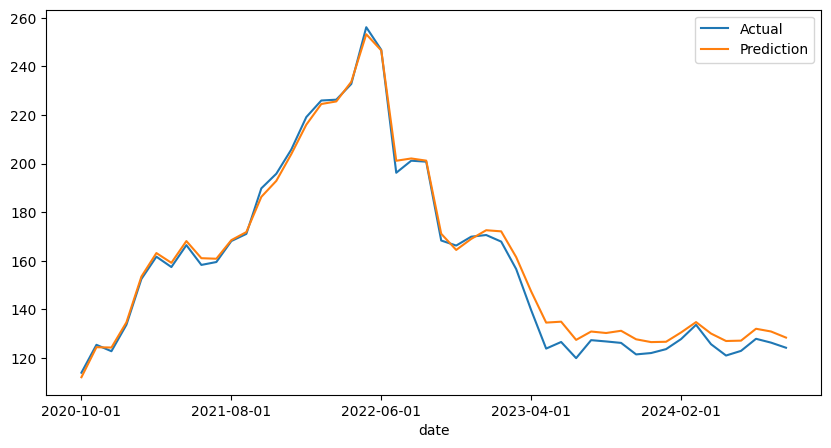

In [35]:
test["Data"] = test.index
testing_dates = test_dates

plot_predictions(testing_dates, test.Estadual, prediction.predicted_Estadual)

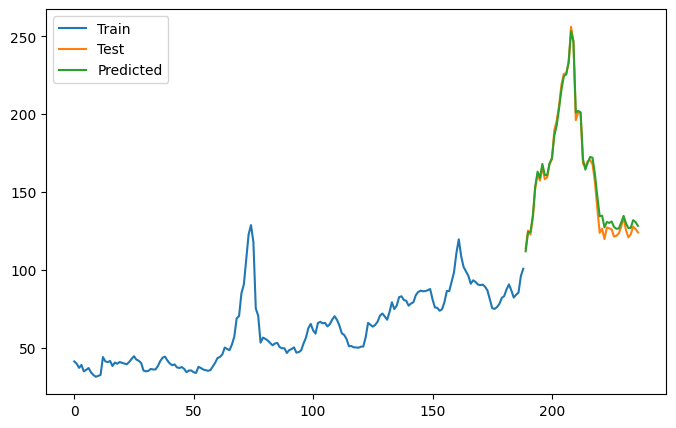

In [36]:
plt.figure(figsize=(8,5))
plt.plot(train.Estadual, label = "Train")
plt.plot(test.Estadual, label = "Test")
plt.plot(prediction, label = "Predicted")
plt.legend(loc='upper left')
plt.show()

In [37]:
test = pd.DataFrame(test)
test["predict_Estadual"] = prediction['predicted_Estadual']
test.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima,USD,Precipitacao,Temperatura,lag_Estadual,predict_Estadual
189,189,Algodão,113.9626,112.5502,3.0,7058.0,6659.0,7377.0,6571.0,4.109590,0.0,24.7,100.8865,112.085707
190,190,Algodão,125.4194,124.6481,3.0,7305.0,7041.0,7508.0,6971.0,4.149464,0.0,25.2,113.9626,124.436889
191,191,Algodão,122.7905,125.1981,3.0,7917.0,7305.0,7946.0,7197.0,4.341011,0.0,24.6,125.4194,124.300801
192,192,Algodão,133.6717,134.9602,3.0,8278.0,7944.0,8468.0,7944.0,4.883855,0.0,25.4,122.7905,134.666368
193,193,Algodão,152.5190,153.2923,3.0,8971.0,8272.0,9622.0,8201.0,5.325580,0.0,24.8,133.6717,153.498194


In [38]:
output_arima = pd.concat([train, test], ignore_index=True)
output_arima["model"] = "ARIMA"
output_arima.to_csv("Algodao_Resultados_ARIMA.csv", index=False, sep=',')

In [39]:
evaluate_model(test["Estadual"], test["predict_Estadual"])

MAE: 3.0911210009744696
RMSE: 3.848049538914281
MAPE: 0.022014778871384894
R-Squared: 0.9899282334732723


Não-estacionário para Estacionário


In [42]:
teste = pd.Series(df["Estadual"], name="Estadual")
teste.describe()

count    237.000000
mean      81.632082
std       47.360522
min       31.573000
25%       44.279700
50%       69.042800
75%       96.346700
max      256.115400
Name: Estadual, dtype: float64

In [43]:
df = pd.read_csv("../../data library/Algodao_v1.csv", sep = ";")
df = df.sort_values(by='Data').reset_index(drop=True)
# df.set_index("Data", inplace = True)
df.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima
0,2005-01-01,Algodão,41.3763,41.0963,3.0,4376.0,4451.0,4831.0,4240.0
1,2005-02-01,Algodão,40.0096,41.2643,3.0,5030.0,4420.0,5030.0,4261.0
2,2005-03-01,Algodão,37.3086,40.0517,3.0,5303.0,5015.0,5460.0,4775.0
3,2005-04-01,Algodão,39.1540,40.9909,3.0,5800.0,5315.0,6050.0,5055.0
4,2005-05-01,Algodão,35.0431,38.6424,3.0,4864.0,5770.0,5800.0,4850.0


In [44]:
df['Data'] = pd.to_datetime(df['Data'])
df["USD"] = df_usd["USD"]
df = df.set_index('Data')
monthly_summary = df.Estadual.resample('ME').mean().ffill()

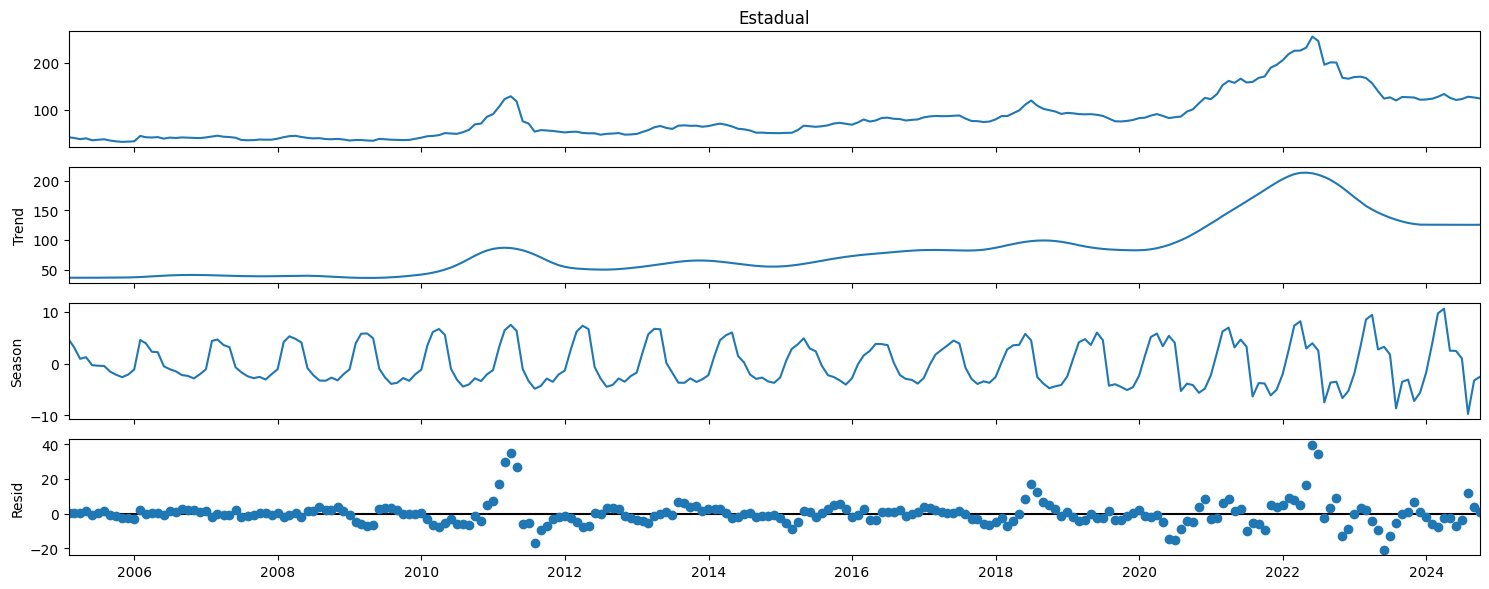

In [45]:
from statsmodels.tsa.seasonal import STL

stl = STL(monthly_summary, seasonal=13)
res = stl.fit()
fig = res.plot()

In [46]:
#Aplicanto a função Log para converter os dados para estacionários

df_log=np.sqrt(df['Estadual'])
df_diff=df_log.diff().dropna()

In [47]:
# from pmdarima.arima import ADFTest

# adf_test = ADFTest(alpha = 0.05)
# adf_test.should_diff(df_diff)

##Dado Estacionário > I = 1

check_stationarity(df_diff, name=df_diff.name)

    Augmented Dickey-Fuller Test on "Estadual" 
    -----------------------------------------------
ADF Statistic: -11.364029
p-value: 0.000000
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Stationary


In [48]:
df["Estadual"] = df_diff
df = df.bfill()
df.head()

,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima,USD
Data,,,,,,,,,
2005-01-01,Algodão,-0.107127,41.0963,3.0,4376.0,4451.0,4831.0,4240.0,2.905457
2005-02-01,Algodão,-0.107127,41.2643,3.0,5030.0,4420.0,5030.0,4261.0,2.905985
2005-03-01,Algodão,-0.217238,40.0517,3.0,5303.0,5015.0,5460.0,4775.0,3.100419
2005-04-01,Algodão,0.149239,40.9909,3.0,5800.0,5315.0,6050.0,5055.0,3.129148
2005-05-01,Algodão,-0.337594,38.6424,3.0,4864.0,5770.0,5800.0,4850.0,3.036777


In [49]:
train_size = int(len(df.Estadual.dropna()) * 0.75)

train, test = df[0:train_size], df[train_size:len(df)]
# train, test = df.Estadual.dropna()[0:size], df.Estadual.dropna()[size:len(df.Estadual.dropna())]
# test = test.reset_index()['Estadual']
history = [x for x in train.Estadual]
predictions = []

In [50]:
arima_model = auto_arima(train.Estadual, X = train[["USD", "País"]], start_p=0, d=1, start_q=0,
                         max_p = 5, max_d = 5, max_q = 5,
                         start_P = 0, D = 1, start_Q=5,
                         max_P=5, max_D=5, max_Q=5,
                         m=13, seasonal=True, error_action ="warn",
                         Trace=True, random_state=20, n_fits=50)

In [51]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            SARIMAX Results                                             
========================================================================================================
Dep. Variable:                                                y   No. Observations:                  177
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2, 3, 4, 5], 13)   Log Likelihood                 -49.026
Date:                                          Thu, 15 May 2025   AIC                            116.052
Time:                                                  10:58:02   BIC                            143.896
Sample:                                              01-01-2005   HQIC                           127.356
                                                   - 09-01-2019                                         
Covariance Type:                                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
USD            0.0223      0.294      0.076      0.940      -0.554       0.599
País           0.0128      0.003      4.999      0.000       0.008       0.018
ma.L1         -0.4565      0.057     -8.011      0.000      -0.568      -0.345
ma.S.L13      -0.9167      0.317     -2.894      0.004      -1.538      -0.296
ma.S.L26      -0.1436      0.129     -1.116      0.264      -0.396       0.109
ma.S.L39       0.0958      0.148      0.647      0.518      -0.194       0.386
ma.S.L52      -0.1289      0.206     -0.625      0.532      -0.533       0.275
ma.S.L65       0.1630      0.155      1.054      0.292      -0.140       0.466
sigma2         0.0882      0.027      3.281      0.001       0.036       0.141
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               275.58
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                            -0.64
Prob(H) (two-sided):                  0.24   Kurtosis:                         9.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
prediction = pd.DataFrame(arima_model.predict(n_periods=len(test), X = test[["USD", "País"]]),
                          # index=test.index
                          )
prediction.columns = ["predicted_Estadual"]
prediction.index = test.index
prediction

,predicted_Estadual
Data,
2019-10-01,-0.202266
2019-11-01,-0.192397
2019-12-01,-0.184214
2020-01-01,-0.225251
2020-02-01,0.059294
2020-03-01,-0.078879
2020-04-01,0.058539
2020-05-01,-0.093514
2020-06-01,-0.002490


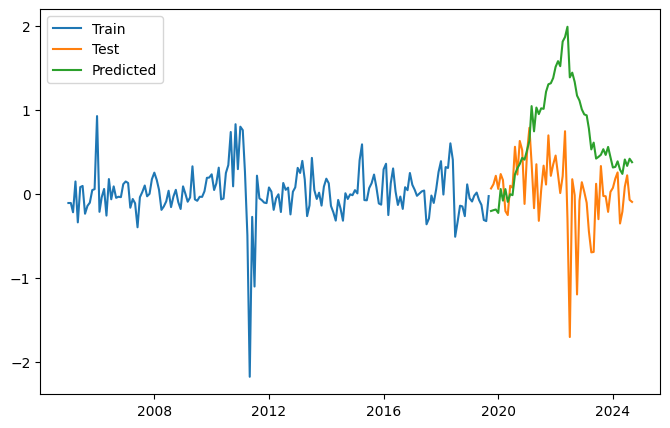

In [53]:
plt.figure(figsize=(8,5))
plt.plot(train.Estadual, label = "Train")
plt.plot(test.Estadual, label = "Test")
plt.plot(prediction, label = "Predicted")
plt.legend(loc='upper left')
plt.show()

In [54]:
test = pd.DataFrame(test)
test["predict_Estadual"] = prediction['predicted_Estadual']
test

,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima,USD,predict_Estadual
Data,,,,,,,,,,
2019-10-01,Algodão,0.066059,78.2103,3.0,6687.0,6150.0,6780.0,6089.0,3.885055,-0.202266
2019-11-01,Algodão,0.116489,80.7916,3.0,6639.0,6701.0,6814.0,6488.0,3.741682,-0.192397
2019-12-01,Algodão,0.216773,84.1352,3.0,7095.0,6640.0,7160.0,6512.0,3.723625,-0.184214
2020-01-01,Algodão,0.060656,84.7679,3.0,6919.0,7123.0,7400.0,6909.0,3.846484,-0.225251
2020-02-01,Algodão,0.237438,89.2206,3.0,6227.0,6901.0,7102.0,6096.0,3.896157,0.059294
2020-03-01,Algodão,0.165511,92.1522,3.0,5321.0,6222.0,6575.0,5292.0,4.001518,-0.078879
2020-04-01,Algodão,-0.203217,89.9462,3.0,5872.0,5200.0,5890.0,5100.0,3.858826,0.058539
2020-05-01,Algodão,-0.250528,86.0440,3.0,5748.0,5671.0,5959.0,5620.0,3.779339,-0.093514
2020-06-01,Algodão,0.098488,87.1328,3.0,6088.0,5748.0,6114.0,5716.0,4.019982,-0.002490


In [55]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

In [56]:
def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"RMSE: {root_mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  print(f"R-Squared: {r2_score(y_test, prediction)}")

In [57]:
evaluate_model(test["Estadual"], test["predict_Estadual"])

MAE: 0.7332635179268318
RMSE: 0.9543161203118651
MAPE: 8.516706812419054
R-Squared: -4.274249762654874
